In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MonteCarloTorus import ThetaFunction
from FQHEWaveFunctions import LLLSymmetricGauge, LLLSymmetricGaugeGrid
from scipy.integrate import dblquad

In [2]:
N = 20
Ns = N
ts = 1j*np.arange(0.7,1.3,0.1)
Lxs = np.sqrt(2*np.pi*Ns/np.imag(ts))
Lys = Lxs*np.imag(ts)

for i in range(ts.size):
    print(f"Torus dimensions at t = {ts[i]} \nLx = ",Lxs[i], "\nLy = ",Lys[i])

Torus dimensions at t = 0.7j 
Lx =  13.398491713813575 
Ly =  9.378944199669503
Torus dimensions at t = 0.7999999999999999j 
Lx =  12.533141373155003 
Ly =  10.026513098524001
Torus dimensions at t = 0.8999999999999999j 
Lx =  11.816359006036773 
Ly =  10.634723105433094
Torus dimensions at t = 0.9999999999999999j 
Lx =  11.209982432795858 
Ly =  11.209982432795856
Torus dimensions at t = 1.0999999999999999j 
Lx =  10.688298875771142 
Ly =  11.757128763348256
Torus dimensions at t = 1.1999999999999997j 
Lx =  10.233267079464886 
Ly =  12.27992049535786
Torus dimensions at t = 1.2999999999999998j 
Lx =  9.831804988974529 
Ly =  12.781346485666885


In [51]:
#get normalisation constants:
for k in range(ts.size):
    overlaps = np.zeros(Ns, dtype=np.complex128)
    errors = np.zeros(Ns, dtype=np.complex128)
    for i in range(Ns):
        print(f"Calculating norm of state {i}..")
        re, re_err = dblquad(inner_product_real, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, Lys[k]/2, args=(i,i,Ns,ts[k]))
        overlaps[i] = re
        errors[i] = re_err
    np.savetxt(f"sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",np.vstack((overlaps,errors)).T)

Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..
Calculating norm of state 10..
Calculating norm of state 11..
Calculating norm of state 12..
Calculating norm of state 13..
Calculating norm of state 14..
Calculating norm of state 15..
Calculating norm of state 16..
Calculating norm of state 17..
Calculating norm of state 18..
Calculating norm of state 19..
Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..
Calculating norm of state 10..
Calculating norm of state 11..
Calculating norm of state 12

In [11]:
def inner_product_real(y,x,n,m,Ns,t):
    return np.real(LLLSymmetricGauge(x+1j*y,Ns,t,m)*np.conj(LLLSymmetricGauge(x+1j*y,Ns,t,n)))
def inner_product_imag(y,x,n,m,Ns,t):
    return np.imag(LLLSymmetricGauge(x+1j*y,Ns,t,m)*np.conj(LLLSymmetricGauge(x+1j*y,Ns,t,n)))

In [26]:
N = 10
Ns = N
t = np.complex128(1j)
Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
Ly = Lx*np.imag(t)

print("Torus dimensions \nLx = ",Lx, "\nLy = ",Ly)

Torus dimensions 
Lx =  7.926654595212022 
Ly =  7.926654595212022


In [29]:
#get normalisation constants:
norms = np.zeros(Ns, dtype=np.complex128)
for i in range(Ns):
    print(f"Calculating norm of state {i}..")
    re, re_err = dblquad(inner_product_real, -Lx/2, Lx/2, -Ly/2, Ly/2, args=(i,i,Ns,t))
    im, im_err = dblquad(inner_product_imag, -Lx/2, Lx/2, -Ly/2, Ly/2, args=(i,i,Ns,t))
    norms[i] = re + 1j*im

if np.any(np.abs(np.imag(norms))>1e-12):
    print('error in norms')
else:
    norms = np.sqrt(np.real(norms))

Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..


In [7]:
norms = np.zeros((ts.size,Ns))
for k in range(ts.size):
    data = np.loadtxt(f"sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)
    norms[k,:] = np.sqrt(data[:,0])

C:\Users\crist\AppData\Local\Temp\ipykernel_8816\883987713.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  norms[k,:] = np.sqrt(data[:,0])


In [14]:
for k in range(ts.size):
    M = np.zeros(Ns, dtype=np.complex128)
    real_errors = np.zeros(Ns, dtype=np.complex128)
    imag_errors = np.zeros(Ns, dtype=np.complex128)
    for i in range(Ns):
        print(f"Calculating norm of state {i,i}..")
        re, re_err = dblquad(inner_product_real, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,i,Ns,ts[k]))
        im, im_err = dblquad(inner_product_imag, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,i,Ns,ts[k]))
        M[i] = (re+1j*im)/(norms[k,i]**2)
        real_errors[i] = re_err/(norms[k,i]**2)
        imag_errors[i] = im_err/(norms[k,i]**2)
    np.savetxt(f"overlap_diag_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",np.vstack((M,real_errors,imag_errors)).T)

Calculating norm of state (0, 0)..
Calculating norm of state (1, 1)..
Calculating norm of state (2, 2)..
Calculating norm of state (3, 3)..
Calculating norm of state (4, 4)..
Calculating norm of state (5, 5)..
Calculating norm of state (6, 6)..
Calculating norm of state (7, 7)..
Calculating norm of state (8, 8)..
Calculating norm of state (9, 9)..
Calculating norm of state (10, 10)..
Calculating norm of state (11, 11)..
Calculating norm of state (12, 12)..
Calculating norm of state (13, 13)..
Calculating norm of state (14, 14)..
Calculating norm of state (15, 15)..
Calculating norm of state (16, 16)..
Calculating norm of state (17, 17)..
Calculating norm of state (18, 18)..
Calculating norm of state (19, 19)..
Calculating norm of state (0, 0)..
Calculating norm of state (1, 1)..
Calculating norm of state (2, 2)..
Calculating norm of state (3, 3)..
Calculating norm of state (4, 4)..
Calculating norm of state (5, 5)..
Calculating norm of state (6, 6)..
Calculating norm of state (7, 7)..


In [5]:
S = np.zeros(ts.size)
for k in range(ts.size):
    M = np.loadtxt(f"IQHE_entropy_results/overlap_diag_N_20_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)[0,:]
    S[k] = -np.sum(np.log(M**2 + (1-M)**2))

C:\Users\crist\AppData\Local\Temp\ipykernel_12840\1857372457.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  S[k] = -np.sum(np.log(M**2 + (1-M)**2))


In [3]:
S = np.zeros(ts.size)
for k in range(ts.size):
    M = np.real(np.loadtxt(f"IQHE_entropy_results/overlap_diag_N_20_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)[0,:])
    S[k] = -np.sum(M*np.log(M) + (1-M)*np.log(1-M))

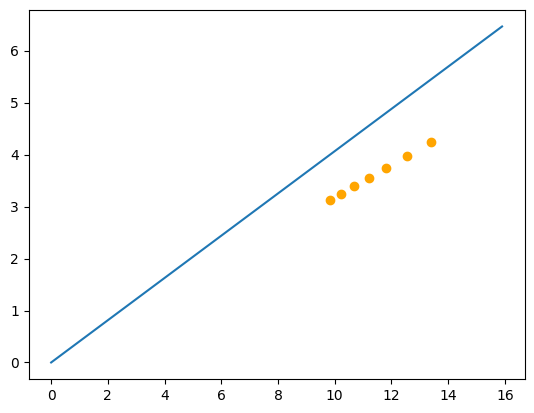

In [6]:
x = np.arange(0,16,0.1)
y = 2*0.20329081*x

plt.scatter(Lxs, S, color='orange')
plt.plot(x,y)

In [12]:
for k in range(ts.size):
    M = np.zeros((Ns,Ns), dtype=np.complex128)
    real_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    imag_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    for i in range(Ns):
        for j in range(Ns):
            print(f"Calculating norm of state {i,j}..")
            re, re_err = dblquad(inner_product_real, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,j,Ns,ts[k]))
            im, im_err = dblquad(inner_product_imag, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,j,Ns,ts[k]))
            M[i,j] = (re+1j*im)/(norms[k,i]*norms[k,j])
            real_errors[i,j] = re_err/(norms[k,i]*norms[k,j])
            imag_errors[i,j] = im_err/(norms[k,i]*norms[k,j])
    np.savetxt(f"overlap_matrix_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",M)
    np.savetxt(f"real_errors_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",real_errors)
    np.savetxt(f"imag_errors_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",imag_errors)

Calculating norm of state (0, 0)..
Calculating norm of state (0, 1)..


c:\Users\crist\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\crist\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Calculating norm of state (0, 2)..
Calculating norm of state (0, 3)..


KeyboardInterrupt: 

In [ ]:
#get overlap matrix for region A: y in [-Ly/2, 0] (cut length Lx)
M = np.zeros((Ns,Ns), dtype=np.complex128)

for i in range(Ns):
    for j in range(Ns):
        print(f"Calculating overlap for states {i,j}..")
        re, re_err = dblquad(inner_product_real, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        im, im_err = dblquad(inner_product_imag, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        M[i,j] = (re + 1j*im)/(norms[i]*norms[j])

In [32]:
#get overlap matrix for region A: y in [-Ly/2, 0] (cut length Lx)
M = np.zeros((Ns,Ns), dtype=np.complex128)

for i in range(Ns):
    for j in range(Ns):
        print(f"Calculating overlap for states {i,j}..")
        re, re_err = dblquad(inner_product_real, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        im, im_err = dblquad(inner_product_imag, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        M[i,j] = (re + 1j*im)/(norms[i]*norms[j])

Calculating overlap for states (0, 0)..
Calculating overlap for states (0, 1)..


c:\Users\crist\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Calculating overlap for states (0, 2)..
Calculating overlap for states (0, 3)..
Calculating overlap for states (0, 4)..
Calculating overlap for states (0, 5)..
Calculating overlap for states (0, 6)..
Calculating overlap for states (0, 7)..
Calculating overlap for states (0, 8)..
Calculating overlap for states (0, 9)..
Calculating overlap for states (1, 0)..
Calculating overlap for states (1, 1)..
Calculating overlap for states (1, 2)..
Calculating overlap for states (1, 3)..
Calculating overlap for states (1, 4)..
Calculating overlap for states (1, 5)..
Calculating overlap for states (1, 6)..
Calculating overlap for states (1, 7)..
Calculating overlap for states (1, 8)..
Calculating overlap for states (1, 9)..
Calculating overlap for states (2, 0)..
Calculating overlap for states (2, 1)..
Calculating overlap for states (2, 2)..
Calculating overlap for states (2, 3)..
Calculating overlap for states (2, 4)..
Calculating overlap for states (2, 5)..
Calculating overlap for states (2, 6)..


In [42]:
np.sum(M)-np.sum(e)

(1.7763568394002505e-15+2.465190328815662e-32j)

In [35]:
e,v = np.linalg.eigh(M)
e

array([0.01286631, 0.01286631, 0.13114797, 0.13114797, 0.5       ,
       0.5       , 0.86885203, 0.86885203, 0.98713369, 0.98713369])

In [38]:
S = -np.sum(np.log(e**2 + (1-e)**2))
S

2.523759192713624

In [40]:
Lx

7.926654595212022

In [24]:
dblquad(inner_product_imag, -Lx/2, Lx/2, 0, Ly/2, args=(1,2,Ns,t))

(-1.4766571070716866e-13, 2.0336934333580284e-06)

In [21]:
psi = LLLSymmetricGaugeGrid(Ns, t, 1, 50)

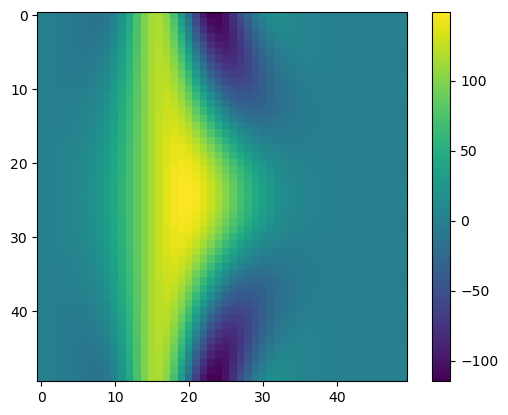

In [22]:
plt.imshow(np.real(psi))
plt.colorbar()

In [129]:
#t gauge
s = 4
n_pts = 60
x = np.linspace(-Lx/2,Lx/2,n_pts)
y = np.linspace(Ly/2,Ly/2,n_pts)
#x, y = np.meshgrid(np.linspace(0,Lx,n_pts), np.linspace(0,Ly,n_pts), indexing='xy')
psi = np.ones((n_pts, n_pts), dtype=np.complex128)


for i in range(x.size):
    for j in range(y.size):
        z = x[i] + 1j*y[j]
        psi[i,j] *= np.exp(1j*np.pi*t*Ns*y[j]**2)
        psi[i,j] *= ThetaFunction(z*Ns/Lx, Ns*t, -s/Ns, 0)

#psi /= np.sqrt(Ns*np.sqrt(np.pi))
#psi /= np.linalg.norm(psi)

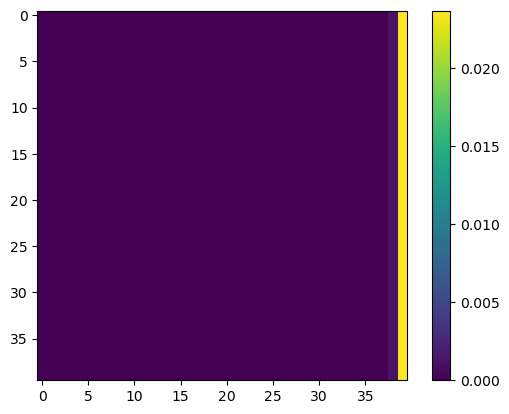

In [133]:
plt.imshow(np.abs(psi)**2)
plt.colorbar()

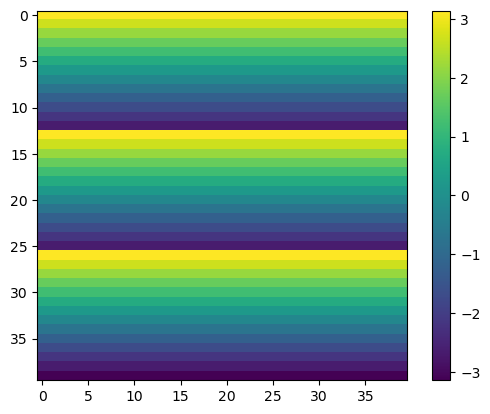

In [95]:
plt.imshow(np.angle(psi))
plt.colorbar()